In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#setting graphical formats
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [3]:
train_df = pd.read_csv('C:/Users/preethi/Downloads/data_train_normal.csv')

In [200]:
test_df = pd.read_csv('C:/Users/preethi/Downloads/data_test_normal.csv')

In [195]:
test_df.head()

,ADC,ADMTOT,AGE,AWEEKEND,BDTOT,CHC,CM_AIDS,CM_ALCOHOL,CM_ANEMDEF,CM_ARTH,...,PAY1_3.0,PAY1_4.0,PAY1_5.0,PAY1_6.0,RACE_1.0,RACE_2.0,RACE_3.0,RACE_4.0,RACE_5.0,RACE_6.0
0,84,6099,67,0,82,1,0.0,0.0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,279,16683,46,0,376,1,0.0,0.0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,314,24067,63,1,454,1,0.0,0.0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,114,10296,44,0,172,1,0.0,0.0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,351,24047,31,0,341,1,0.0,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [13]:
train_df.shape

(24542, 110)

In [8]:
test_df.shape

(3065, 114)

In [12]:
train_df = train_df.drop(["READMIT", "VisitLink","YEAR","found"],axis=1)

In [14]:
test_df = test_df.drop(["READMIT", "VisitLink","YEAR","found"],axis=1)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [161]:
X_train = train_df.drop(['LOS'],axis=1)

y_train = train_df.loc[:,['LOS']]

In [163]:
X_test = test_df.drop(['LOS'],axis=1)

y_test = test_df.loc[:,['LOS']]

In [167]:
X_test = X_test[['ADC',
'ADMTOT',
'AGE',
'CHC',
'CM_ANEMDEF',
'CM_COAG',
'CM_LIVER',
'CM_LYTES',
'CM_OBESE',
'CM_PARA',
'CM_WGHTLOSS',
'FTMDTF',
'GENHOS',
'NCHRONIC',
'NDX',
'NPR',
'TOTCHG_X',
'VEM',
'CCI',
'SUROPOP',
'Sepsis',
'UTI',
'PNA',
'DVT',
'Infection',
'MAPP9n',
'HMO86',
'LIVRHOS',
'ATYPE_1',
'ATYPE_2',
'DISPUNIFORM_5.0',
'DISPUNIFORM_6.0',
'HOSPST_CA',
'HOSPST_FL',
'HOSPST_MD',
'HOSPST_WA',
'MEDINCSTQ_1.0',
'PAY1_2.0']]

In [165]:
y_test.shape

(3065, 1)

In [168]:
import statsmodels.api as sm


X_train = X_train[['ADC',
'ADMTOT',
'AGE',
'CHC',
'CM_ANEMDEF',
'CM_COAG',
'CM_LIVER',
'CM_LYTES',
'CM_OBESE',
'CM_PARA',
'CM_WGHTLOSS',
'FTMDTF',
'GENHOS',
'NCHRONIC',
'NDX',
'NPR',
'TOTCHG_X',
'VEM',
'CCI',
'SUROPOP',
'Sepsis',
'UTI',
'PNA',
'DVT',
'Infection',
'MAPP9n',
'HMO86',
'LIVRHOS',
'ATYPE_1',
'ATYPE_2',
'DISPUNIFORM_5.0',
'DISPUNIFORM_6.0',
'HOSPST_CA',
'HOSPST_FL',
'HOSPST_MD',
'HOSPST_WA',
'MEDINCSTQ_1.0',
'PAY1_2.0']]


# Note the difference in argument order
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LOS   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     2742.
Date:                Sun, 28 Oct 2018   Prob (F-statistic):               0.00
Time:                        05:36:55   Log-Likelihood:                -69321.
No. Observations:               24542   AIC:                         1.387e+05
Df Residuals:                   24504   BIC:                         1.390e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
ADC                 0.0023      0.000      7.185      0.000       0.002       0.003
ADMTOT          -6.312e-05   6.05e-06    -10.426      0.000    -7.5e-05   -5.13e-05
AGE                -0.0090      0.002     -4.358      0.000      -0.013      -0.005
CHC                 8.8454      0.483     18.295      0.000       7.898       9.793
CM_ANEMDEF          0.3629      0.078      4.649      0.000       0.210       0.516
CM_COAG            -0.4450      0.104     -4.290      0.000      -0.648      -0.242
CM_LIVER           -0.3144      0.074     -4.254      0.000      -0.459      -0.170
CM_LYTES            0.2235      0.075      2.983      0.003       0.077       0.370
CM_OBESE           -0.5471      0.102     -5.374      0.000      -0.747      -0.348
CM_PARA             1.7643      0.367      4.813      0.000       1.046       2.483
CM_WGHTLOSS         1.3931      0.126     11.035      0.000       1.146       1.641
FTMDTF             -0.0009   9.15e-05     -9.633      0.000      -0.001      -0.001
GENHOS             -7.6896      0.489    -15.715      0.000      -8.649      -6.731
NCHRONIC           -0.1250      0.017     -7.180      0.000      -0.159      -0.091
NDX                 0.1671      0.010     16.822      0.000       0.148       0.187
NPR                 0.2946      0.012     25.196      0.000       0.272       0.317
TOTCHG_X         4.754e-05   3.93e-07    120.996      0.000    4.68e-05    4.83e-05
VEM               1.01e-05   8.61e-07     11.730      0.000    8.41e-06    1.18e-05
CCI                -0.0420      0.011     -3.987      0.000      -0.063      -0.021
SUROPOP         -1.191e-05   3.43e-06     -3.475      0.001   -1.86e-05   -5.19e-06
Sepsis              5.3519      0.232     23.038      0.000       4.897       5.807
UTI                 0.3908      0.156      2.500      0.012       0.084       0.697
PNA                 1.2667      0.192      6.584      0.000       0.890       1.644
DVT                 3.8975      0.392      9.941      0.000       3.129       4.666
Infection          -2.6670      0.298     -8.949      0.000      -3.251      -2.083
MAPP9n              1.3062      0.119     10.956      0.000       1.073       1.540
HMO86              -0.6916      0.127     -5.456      0.000      -0.940      -0.443
LIVRHOS            -0.5958      0.069     -8.585      0.000      -0.732      -0.460
ATYPE_1             0.8275      0.075     11.059      0.000       0.681       0.974
ATYPE_2             0.6345      0.122      5.182      0.000       0.395       0.875
DISPUNIFORM_5.0     2.6441      0.129     20.524      0.000       2.392       2.897
DISPUNIFORM_6.0     1.2845      0.075     17.206      0.000       1.138       1.431
HOSPST_CA          -2.5194      0.090    -28.143      0.000      -2.695      -2.344
HOSPST_FL          -0.8405      0.083    -10.066      0.000

In [184]:
#Main testing of bad cases
d = {'y' : y_test['LOS'], 'pred': np.ceil(predictions)}
prediction = pd.DataFrame(data = d)
tmp = prediction['y']-prediction['pred']

In [190]:
tmp[tmp<0].count()

1717

In [191]:
2084/3065
1717/3065

0.5601957585644372

In [174]:
plt.rcParams["figure.figsize"] = [50,20]
plt.figure(figsize=(500,100))
# ax=plt.gca()
# ax.axis([-25,25,0,8000])
tmp.hist(bins = 100)
plt.show()

In [49]:
d = {'y' : y_train['LOS'], 'pred': round(predictions,0)}

In [51]:
prediction = pd.DataFrame(data = d)

In [54]:
tmp = prediction['y']-prediction['pred']

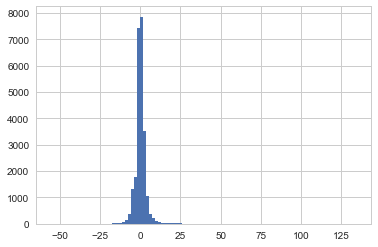

In [58]:
tmp.hist(bins = 100)
plt.show()


In [60]:
model = LinearRegression()
model.fit(X_train, y_train)

predictions1 = model.predict(X_train)

print ('GFT + Wiki / GT R-squared: %.4f' % model.score(X_train, y_train))

GFT + Wiki / GT R-squared: 0.6581


In [72]:
tmp = round(y_train - predictions1,0)

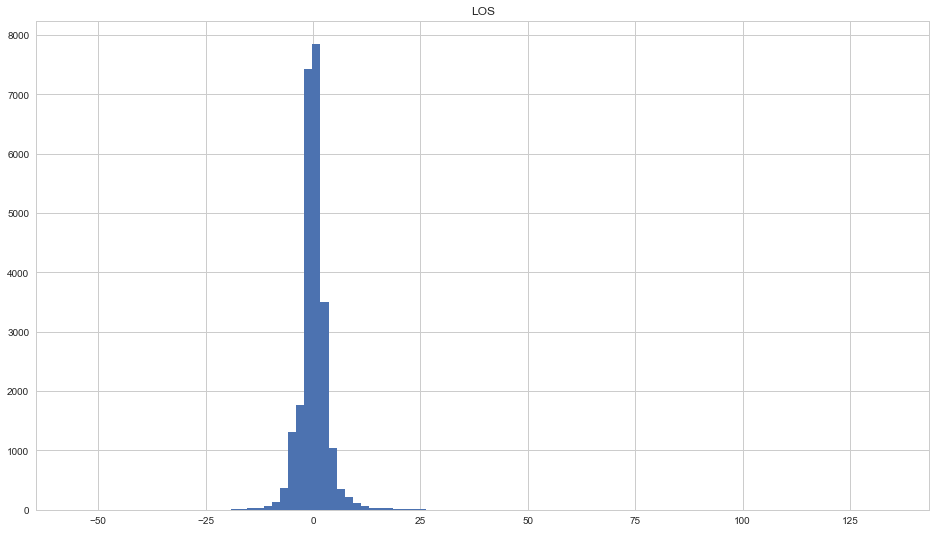

In [87]:
plt.rcParams["figure.figsize"] = [16,9]
plt.figure(figsize=(500,100))
# ax=plt.gca()
# ax.axis([-25,25,0,8000])
tmp.hist(bins = 100)
plt.show()

In [82]:
#Cross Validation
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LinearRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.632


In [85]:
# Perform 10-fold cross validation
scores = cross_val_score(modelCV, X_train, y_train, cv=10)
print ("Cross validated scores:", scores)


Cross validated scores: [ 0.69891762  0.7007048   0.65385766  0.63229543  0.6654957   0.63572585
  0.62277419  0.58199293  0.47077028  0.65798019]


In [92]:
# from sklearn.base import BaseEstimator, RegressorMixin
# import statsmodels.formula.api as smf
# import statsmodels.api as sm
 
# class statsmodel(BaseEstimator, RegressorMixin):
#     def __init__(self, sm_class, formula):
#         self.sm_class = sm_class
#         self.formula = formula
#         self.model = None
#         self.result = None
 
#     def fit(self,data,dummy):
#         self.model = self.sm_class(self.formula,data)
#         self.result = self.model.fit()
 
#     def predict(self,X):
#         return self.result.predict(X)

In [227]:
# create training and testing vars
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size=0.2)
print (X_train1.shape, y_train1.shape)
print (X_test1.shape, y_test1.shape)

(19633, 38) (19633, 1)
(4909, 38) (4909, 1)


In [228]:
model = sm.OLS(y_train1, X_train1).fit()
predictions1 = model.predict(X_test1)

In [229]:
model.summary()
#80.7, 80.8,80.8,81.5,80.9

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LOS   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     2272.
Date:                Sun, 28 Oct 2018   Prob (F-statistic):               0.00
Time:                        07:44:44   Log-Likelihood:                -55328.
No. Observations:               19633   AIC:                         1.107e+05
Df Residuals:                   19595   BIC:                         1.110e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
ADC                 0.0020      0.000      5.718      0.000       0.001       0.003
ADMTOT          -5.975e-05   6.73e-06     -8.883      0.000   -7.29e-05   -4.66e-05
AGE                -0.0090      0.002     -3.918      0.000      -0.013      -0.004
CHC                 8.7827      0.514     17.095      0.000       7.776       9.790
CM_ANEMDEF          0.3399      0.087      3.920      0.000       0.170       0.510
CM_COAG            -0.4108      0.116     -3.547      0.000      -0.638      -0.184
CM_LIVER           -0.3033      0.082     -3.712      0.000      -0.463      -0.143
CM_LYTES            0.2357      0.084      2.820      0.005       0.072       0.400
CM_OBESE           -0.5550      0.114     -4.888      0.000      -0.778      -0.332
CM_PARA             2.1132      0.397      5.317      0.000       1.334       2.892
CM_WGHTLOSS         1.4311      0.140     10.239      0.000       1.157       1.705
FTMDTF             -0.0008      0.000     -8.212      0.000      -0.001      -0.001
GENHOS             -7.4997      0.520    -14.418      0.000      -8.519      -6.480
NCHRONIC           -0.1315      0.019     -6.825      0.000      -0.169      -0.094
NDX                 0.1745      0.011     15.806      0.000       0.153       0.196
NPR                 0.2924      0.013     22.496      0.000       0.267       0.318
TOTCHG_X         4.758e-05   4.24e-07    112.290      0.000    4.68e-05    4.84e-05
VEM              1.016e-05    9.6e-07     10.580      0.000    8.28e-06     1.2e-05
CCI                -0.0470      0.012     -4.025      0.000      -0.070      -0.024
SUROPOP         -1.092e-05   3.83e-06     -2.853      0.004   -1.84e-05   -3.42e-06
Sepsis              5.2653      0.257     20.450      0.000       4.761       5.770
UTI                 0.4071      0.173      2.359      0.018       0.069       0.745
PNA                 1.0239      0.213      4.809      0.000       0.607       1.441
DVT                 3.0509      0.458      6.662      0.000       2.153       3.949
Infection          -2.7954      0.330     -8.482      0.000      -3.441      -2.149
MAPP9n              1.2279      0.132      9.281      0.000       0.969       1.487
HMO86              -0.7487      0.140     -5.333      0.000      -1.024      -0.474
LIVRHOS            -0.5599      0.077     -7.256      0.000      -0.711      -0.409
ATYPE_1             0.8771      0.083     10.560      0.000       0.714       1.040
ATYPE_2             0.6084      0.137      4.457      0.000       0.341       0.876
DISPUNIFORM_5.0     2.4286      0.144     16.918      0.000       2.147       2.710
DISPUNIFORM_6.0     1.3235      0.082     16.066      0.000       1.162       1.485
HOSPST_CA          -2.5351      0.099    -25.494      0.000      -2.730      -2.340
HOSPST_FL          -0.9166      0.092     -9.920      0.000

In [230]:
d = {'y' : y_test1['LOS'], 'pred': round(predictions1,0)}
prediction = pd.DataFrame(data = d)
tmp = prediction['y']-prediction['pred']

In [231]:
print("RMSE",np.sqrt(np.mean(tmp**2)))
print("MSE",np.mean(tmp**2))
print("Absolute Mean",np.mean(np.abs(tmp)))

RMSE 4.1992297211
MSE 17.633530250560195
Absolute Mean 2.2255041760032594


In [147]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test1['LOS'], predictions1))

In [148]:
rms
#4.27, 4.006,4.43,4.17,4.23

4.098225846711142

In [116]:
predictions1.shape

(4909,)

In [104]:
print ("Score:", model.score(X_test1, y_test1))

AttributeError: 'OLSResults' object has no attribute 'score'

In [96]:
 
# # create a model
# clf = statsmodel(smf.ols, "LOS ~ ADC+ADMTOT+AGE+CHC+CM_ANEMDEF+CM_COAG+CM_LIVER+CM_LYTES+CM_OBESE+CM_PARA+CM_WGHTLOSS+FTMDTF+GENHOS+NCHRONIC+NDX+NPR+TOTCHG_X+VEM+CCI+SUROPOP+Sepsis+UTI+PNA+DVT+Infection+MAPP9n+HMO86+LIVRHOS+ATYPE_1+ATYPE_2+DISPUNIFORM_5.0+DISPUNIFORM_6.0+HOSPST_CA+HOSPST_FL+HOSPST_MD+HOSPST_WA+MEDINCSTQ_1.0+PAY1_2.0")
 
# # Print cross val score on this model
# print (cross_val_score(clf, X_train, y_train))
 
# # # Same thing on sklearn's linear regression model
# # lm = linear_model.LinearRegression()
 
# # print (cross_val_score(lm , ccard.data.iloc[:,1:3].values, ccard.data.iloc[:,0].values))


In [27]:
y_train.dtypes

LOS    int64
dtype: object

In [22]:
X_train.dtypes.tail(60)

CCI                      int64
PE                       int64
MI                       int64
Sepsis                   int64
UTI                      int64
PNA                      int64
DVT                      int64
Infection                int64
Cardiac                  int64
Surgery_Complications    int64
MAPP1n                   int64
MAPP2n                   int64
MAPP3n                   int64
MAPP5n                   int64
MAPP6n                   int64
MAPP7n                   int64
MAPP8n                   int64
MAPP9n                   int64
MAPP10n                  int64
MAPP11n                  int64
MAPP12n                  int64
MAPP13n                  int64
MAPP16n                  int64
HMO86                    int64
LIVRHOS                  int64
MSICHOS                  int64
TETOT                    int64
MSICBD                   int64
ATYPE_1                  int64
ATYPE_2                  int64
ATYPE_3                  int64
DISPUNIFORM_1.0          int64
DISPUNIF

In [21]:
X_train.shape

(24542, 109)

In [192]:
cost_df = pd.read_csv('C:/Users/preethi/Downloads/cost_df.csv')

In [193]:
cost_df.head()

,VisitLink,LOS,TOTCHG_X
0,1858.0,3.0,18186.25
1,2198.0,8.0,69198.47
2,2707.0,8.0,24653.21
3,5598.0,25.0,178233.89
4,14206.0,12.0,60005.26


In [206]:
output = test_df[['VisitLink',
'ADC',
'ADMTOT',
'AGE',
'CHC',
'CM_ANEMDEF',
'CM_COAG',
'CM_LIVER',
'CM_LYTES',
'CM_OBESE',
'CM_PARA',
'CM_WGHTLOSS',
'FTMDTF',
'GENHOS',
'NCHRONIC',
'NDX',
'NPR',
'TOTCHG_X',
'VEM',
'CCI',
'SUROPOP',
'Sepsis',
'UTI',
'PNA',
'DVT',
'Infection',
'MAPP9n',
'HMO86',
'LIVRHOS',
'ATYPE_1',
'ATYPE_2',
'DISPUNIFORM_5.0',
'DISPUNIFORM_6.0',
'HOSPST_CA',
'HOSPST_FL',
'HOSPST_MD',
'HOSPST_WA',
'MEDINCSTQ_1.0',
'PAY1_2.0',
'LOS']]

In [211]:
output['LOS_pred'] = prediction['pred']

C:\Users\Preethi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [213]:
output[['LOS','LOS_pred']]

,LOS,LOS_pred
0,2,4.0
1,6,11.0
2,46,25.0
3,3,5.0
4,2,2.0
5,2,6.0
6,2,4.0
7,4,5.0
8,11,15.0
9,7,7.0


In [216]:
output = output.merge(cost_df,on = 'VisitLink',how = 'left')

In [217]:
output.columns

Index(['VisitLink', 'ADC', 'ADMTOT', 'AGE', 'CHC', 'CM_ANEMDEF', 'CM_COAG',
       'CM_LIVER', 'CM_LYTES', 'CM_OBESE', 'CM_PARA', 'CM_WGHTLOSS', 'FTMDTF',
       'GENHOS', 'NCHRONIC', 'NDX', 'NPR', 'TOTCHG_X_x', 'VEM', 'CCI',
       'SUROPOP', 'Sepsis', 'UTI', 'PNA', 'DVT', 'Infection', 'MAPP9n',
       'HMO86', 'LIVRHOS', 'ATYPE_1', 'ATYPE_2', 'DISPUNIFORM_5.0',
       'DISPUNIFORM_6.0', 'HOSPST_CA', 'HOSPST_FL', 'HOSPST_MD', 'HOSPST_WA',
       'MEDINCSTQ_1.0', 'PAY1_2.0', 'LOS_x', 'LOS_pred', 'LOS_y',
       'TOTCHG_X_y'],
      dtype='object')

In [218]:
#output.columns = output.columns.str.replace('LOS_y', 'Total_READ_LOS')
output.rename(columns={'LOS_y':'Total_READ_LOS',
                        'LOS_pred':'Ideal_LOS',
                        'LOS_x':'Actual_LOS',
                        'TOTCHG_X_y':'Total_READ_CHG'}, 
                 inplace=True)
 

In [219]:
output.columns

Index(['VisitLink', 'ADC', 'ADMTOT', 'AGE', 'CHC', 'CM_ANEMDEF', 'CM_COAG',
       'CM_LIVER', 'CM_LYTES', 'CM_OBESE', 'CM_PARA', 'CM_WGHTLOSS', 'FTMDTF',
       'GENHOS', 'NCHRONIC', 'NDX', 'NPR', 'TOTCHG_X_x', 'VEM', 'CCI',
       'SUROPOP', 'Sepsis', 'UTI', 'PNA', 'DVT', 'Infection', 'MAPP9n',
       'HMO86', 'LIVRHOS', 'ATYPE_1', 'ATYPE_2', 'DISPUNIFORM_5.0',
       'DISPUNIFORM_6.0', 'HOSPST_CA', 'HOSPST_FL', 'HOSPST_MD', 'HOSPST_WA',
       'MEDINCSTQ_1.0', 'PAY1_2.0', 'Actual_LOS', 'Ideal_LOS',
       'Total_READ_LOS', 'Total_READ_CHG'],
      dtype='object')

In [220]:
output['CHG_per_VisitLink'] = output['Total_READ_CHG']/output['Total_READ_LOS']

In [224]:
output[['CHG_per_VisitLink','Total_READ_CHG','Total_READ_LOS','Ideal_LOS','Cost_Saved']]
#output['Cost_Saved'] = output['CHG_per_VisitLink'] * (output['Total_READ_LOS']-output['Ideal_LOS'])

,CHG_per_VisitLink,Total_READ_CHG,Total_READ_LOS,Ideal_LOS,Cost_Saved
0,8402.375000,6.721900e+04,8.0,4.0,33609.500000
1,24838.000000,2.980560e+05,12.0,11.0,24838.000000
2,4937.920000,2.468960e+05,50.0,25.0,123448.000000
3,16721.794901,1.504962e+05,9.0,5.0,66887.179603
4,5269.666667,1.580900e+04,3.0,2.0,5269.666667
5,23594.142857,1.651590e+05,7.0,6.0,23594.142857
6,5125.197500,2.050079e+04,4.0,4.0,0.000000
7,5389.950000,7.006935e+04,13.0,5.0,43119.600000
8,5124.978261,1.178745e+05,23.0,15.0,40999.826087
9,6191.495556,5.572346e+04,9.0,7.0,12382.991111


In [225]:
output['Cost_Saved'].sum()

242209281.46907726

In [209]:
output['LOS']

0        2
1        6
2       46
3        3
4        2
5        2
6        2
7        4
8       11
9        7
10      10
11      47
12       7
13       6
14      20
15      17
16       5
17       8
18      13
19      12
20       2
21       2
22      18
23       5
24      13
25       4
26       7
27       2
28       9
29       6
        ..
3035     6
3036    14
3037     4
3038    12
3039    19
3040     5
3041     3
3042    17
3043    15
3044    20
3045     1
3046     4
3047     4
3048    22
3049     2
3050     6
3051     4
3052     8
3053     2
3054     6
3055    40
3056    49
3057     2
3058     7
3059     7
3060     4
3061     4
3062    15
3063     4
3064     1
Name: LOS, Length: 3065, dtype: int64

In [226]:
output.to_csv('C:/Users/preethi/Downloads/output_final.csv',index=False)